In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/mmccoy/OneDrive - Valorem Reply/Desktop/PythonPlay/HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape #dimension DataFrame

(14999, 10)

In [5]:
data.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

In [6]:
#Data processing - identify and reating of missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
data.dropna().isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
#Check for duplicate records and simply have the unique records to be included into the dataset

data[data.duplicated()] #Note that for this dataset, we won't see any duplicates. 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
#If we needed to drop duplicates, we would do the following
#data.drop_duplicates()

In [34]:
#Correlation Matrix
matrix = data.corr(
    #method = 'pearson',  # The method of correlation
    #method = 'kendall',
    method = 'spearman',
    min_periods = 1      # Min number of observations required
).round(2)

# These are values from -1 to 1 -- values closer to 1 or -1 indicate a stronger correlation 
# Positive Correlation: relationshjip of variable is moving in same direciton
#Negative Correlation: relationship of variable is moving in opposite direction (e.g. if one is increasing, then the other is decreasing)
#No Correlation: No relationship

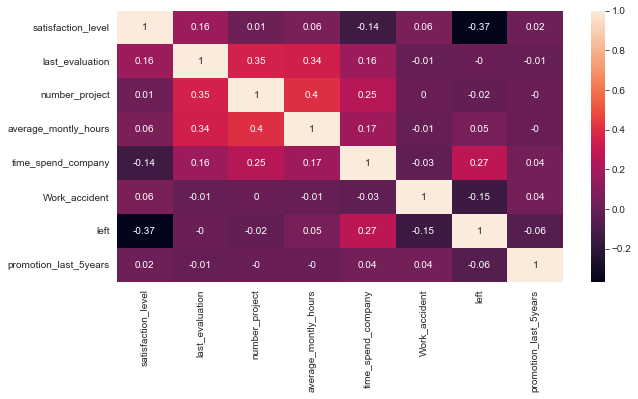

In [35]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
sns.heatmap(matrix, annot=True)
plt.show()

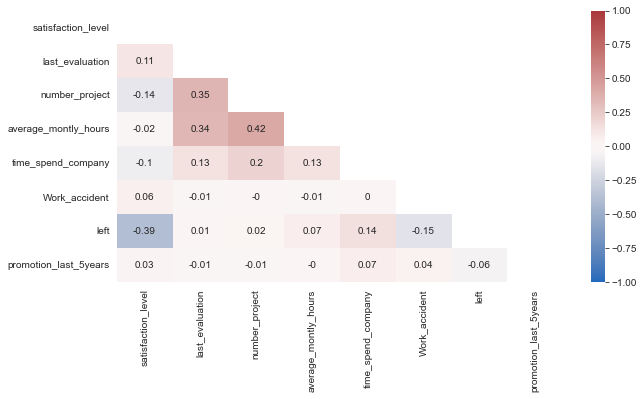

In [28]:
#plot the lower half -- the correlation matrix is symmetric, so this will help us find strong correlations
matrix = data.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
fig = plt.rcParams["figure.figsize"] = (10,5)

In [17]:
## Inspect some relationships with bar charts and scatterplots
ftr = data.columns.tolist() #Collect the names of all the columns
#print(ftr)

ValueError: num must be 1 <= num <= 8, not 9

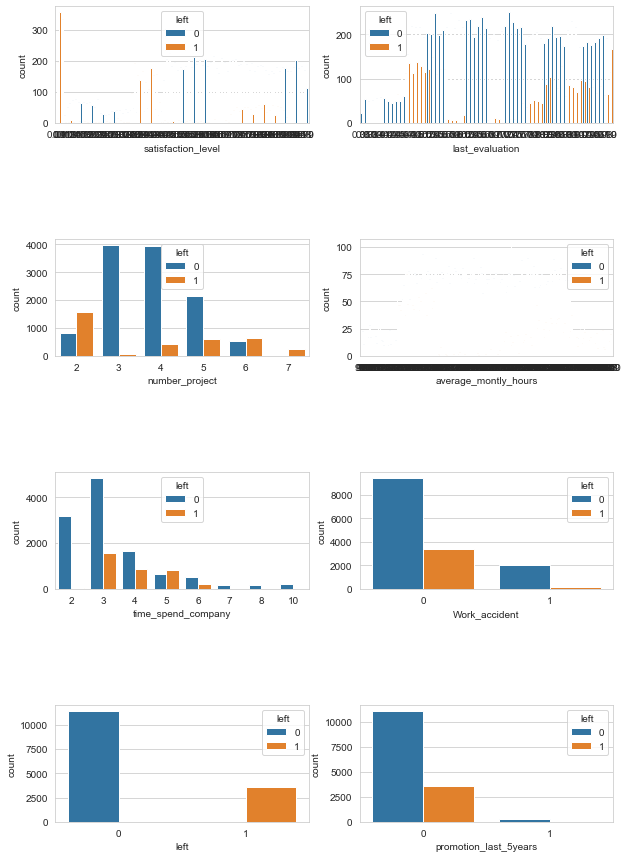

In [23]:
fig = plt.subplots(figsize =(10,15)) #setup the figure
#create a barchart for each variable (each combination)
for p,q in enumerate(ftr):
    plt.subplot(4,2,p+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=q, data=data, hue='left')